In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
from mpl_toolkits.mplot3d import Axes3D


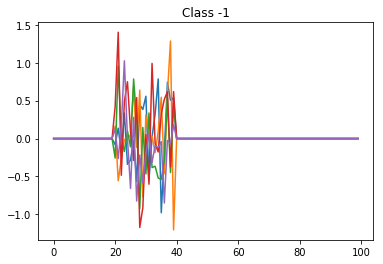

In [42]:
np.random.seed(71)

NOISE_STD = 0.5

total_samples_in_each_class = 5
tsc = total_samples_in_each_class

timestep = 100

X = np.random.normal(0, NOISE_STD, (total_samples_in_each_class*2, timestep))
mark = np.zeros((timestep))
mark[20:40] = 1
X[:total_samples_in_each_class] = (X[:total_samples_in_each_class] ) * mark 

X[-total_samples_in_each_class:] = (X[-total_samples_in_each_class:]  ) * mark 

# class1 = np.random.normal(0, NOISE_STD, (5, timestep))
# class1[:, 0] = 1



plt.title('Class -1')
for i in range(5):
    plt.plot(X[i, :]) 

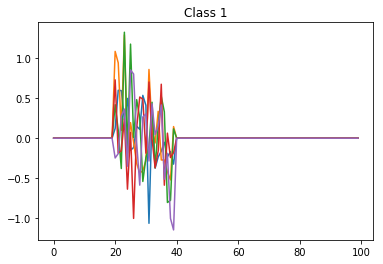

In [43]:
plt.title('Class 1')
for i in range(5, 10):
    plt.plot(X[i, :]) 

In [44]:
NO_RESERVIORS = 3

In [45]:
np.random.seed(71)
W_rec = np.random.uniform(-0.5, 0.5, (NO_RESERVIORS, NO_RESERVIORS)) + 0.00001* np.eye(NO_RESERVIORS, NO_RESERVIORS)


W_in = np.random.normal(0, 0.5, (1, NO_RESERVIORS))

W_out = np.random.normal(0, 0.5, (NO_RESERVIORS,2))

In [82]:
def forward(x, normalize=False, alpha=0.4, normalize_spectral_r=0, title='Dummy'):
    total_steps = x.shape[1]
    h = np.zeros((x.shape[0], NO_RESERVIORS, total_steps))
    ht = np.zeros((x.shape[0], NO_RESERVIORS))
    
    w_rec_norm = W_rec
    eig_values, _ = np.linalg.eig(w_rec_norm)
    radius = np.max(eig_values)
    print("Spectral radius : %f" % radius)
    if normalize_spectral_r > 0:
        w_rec_norm = normalize_spectral_r * W_rec / radius
       
        eig_values, _ = np.linalg.eig(w_rec_norm)
        radius_norm = np.max(eig_values)
        print("Spectral radius after normalization : %f" % radius_norm)

    out = np.zeros((x.shape[0], total_steps, 1))
    
    for i in range(total_steps):

        xt = np.dot(x[:, i].reshape(-1, 1), W_in)

        ht_tilde = np.tanh(xt + np.dot(ht, w_rec_norm))
        ht = (1-alpha)*ht + alpha*ht_tilde


        h[:, :, i] = ht


    return h, None

res = forward(X, normalize_spectral_r=0.5)

print(res[0].shape)

Spectral radius : 0.734625
Spectral radius after normalization : 0.500000
(10, 3, 100)


In [83]:
cl_dict = {
    'Class -1': 'r',
    'Class 1': 'b'
}

Spectral radius : 0.734625
Spectral radius after normalization : 0.800000


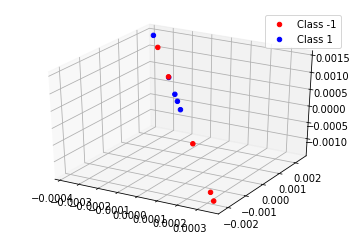

In [84]:
def plot_3d(data, title=''):
    ax = plt.axes(projection='3d')

    phi_X = data[:, :, -1]
    class_1 = phi_X[:tsc]
    class_2 = phi_X[-tsc:]

    for c, cl in zip(('Class -1','Class 1'), (class_1, class_2)):
        ax.scatter3D(cl[:, 0], cl[:, 1], cl[:, 2], color=cl_dict[c], label=c, alpha=1);
    plt.title(title)
    plt.legend()


res_default = forward(X,  normalize_spectral_r=0.8)
plot_3d(res_default[0], title="")

Spectral radius : 0.734625
Spectral radius after normalization : 1.500000


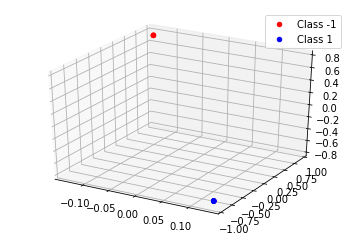

In [85]:
res_norm_W_rec = forward(X, normalize_spectral_r=1.5)
plot_3d(res_norm_W_rec[0], title="")

In [86]:
# res_better = forward(X, alpha=0.3, normalize_spectral_r=0.5)
# plot_3d(res_better[0], title="$\phi(x)$ with normalization")

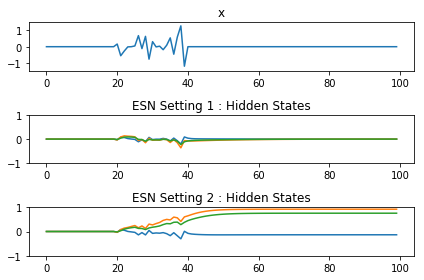

In [87]:
def plot_data_and_hidden_states(data, states_arr=[res_default[0], res_norm_W_rec[0]], index=0):
    plt.subplot(3,1, 1)
    plt.title("x")
    plt.plot(data[index, :])
    plt.ylim([-1.5,1.5])


    for i, states in enumerate(states_arr):
        plt.subplot(3,1, 2+i)
        plt.title('ESN Setting %d : Hidden States' % (i+1))
        for i in range(states.shape[1]):
            plt.plot(states[index, i, :])
            plt.ylim([-1,1])
    plt.tight_layout()
plot_data_and_hidden_states(X, index=1)

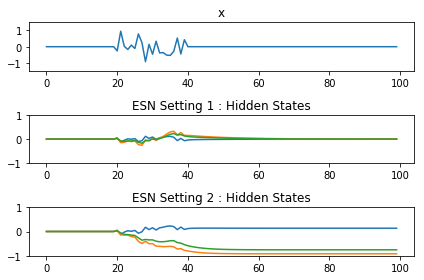

In [88]:
plot_data_and_hidden_states(X, index=2)

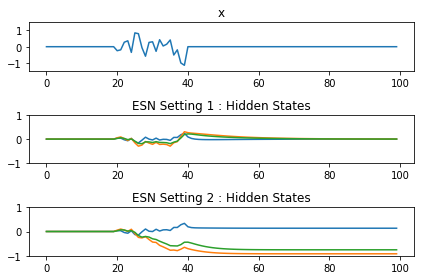

In [89]:
plot_data_and_hidden_states(X, index=9)

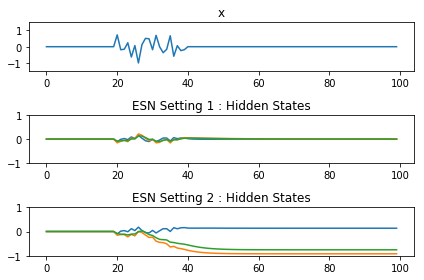

In [90]:
plot_data_and_hidden_states(X, index=8)

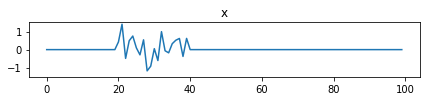

ESN Setting 1 : Hidden State 1-th


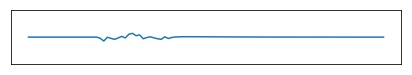

ESN Setting 1 : Hidden State 2-th


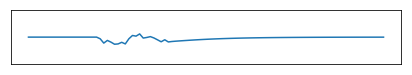

ESN Setting 1 : Hidden State 3-th


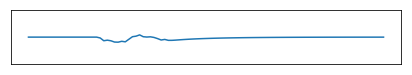

ESN Setting 2 : Hidden State 1-th


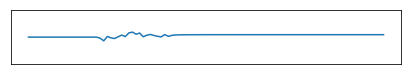

ESN Setting 2 : Hidden State 2-th


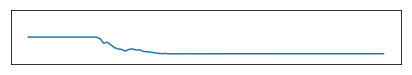

ESN Setting 2 : Hidden State 3-th


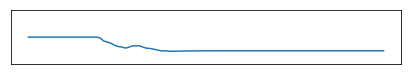

In [95]:
def plot_data_and_hidden_states_separated_printing(data, states_arr=[res_default[0], res_norm_W_rec[0]], index=0):
    no_networks = len(states_arr)
    no_reservour_per_network = len(states_arr[0])
    no_rows =1+no_networks*no_reservour_per_network
    
#     plt.figure(figsize=(6, 1.3*no_rows))
#     plt.subplot(no_rows,1, 1)
    
    plt.figure(figsize=(7, 1))
    plt.title("x")
    plt.plot(data[index, :])
    plt.ylim([-1.5,1.5])
    plt.show()
    
    count = 2
    for i, states in enumerate(states_arr):
    
        for j in range(states.shape[1]):
            plt.figure(figsize=(7, 1))


#             plt.subplot(no_rows,1, count)
            print('ESN Setting %d : Hidden State %d-th' % (i+1, j+1))
    

            plt.plot(states[index, j, :])
            plt.ylim([-1.5,1.5])
            plt.yticks([])
            plt.xticks([])
            plt.show()
            count = count + 1
#     plt.tight_layout()
plot_data_and_hidden_states_separated_printing(X, index=3)

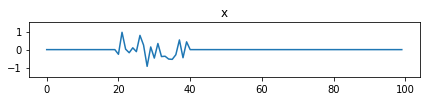

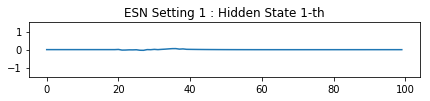

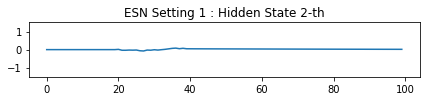

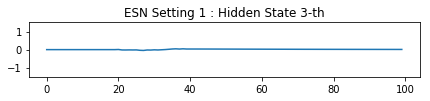

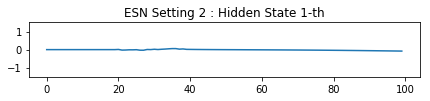

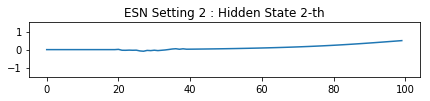

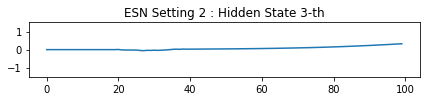

In [81]:
plot_data_and_hidden_states_separated_printing(X, index=2)

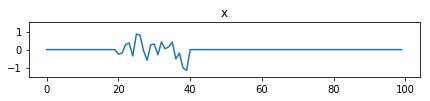

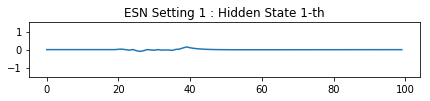

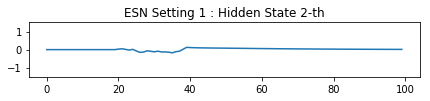

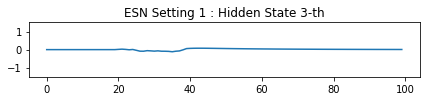

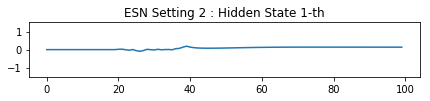

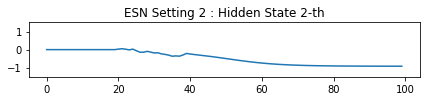

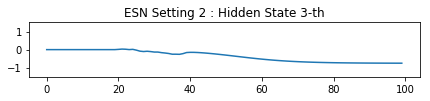

In [69]:
plot_data_and_hidden_states_separated_printing(X, index=9)

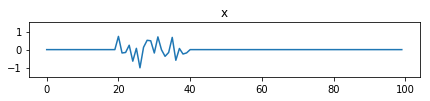

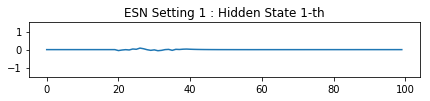

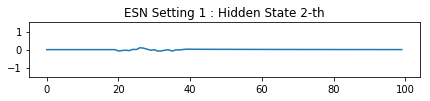

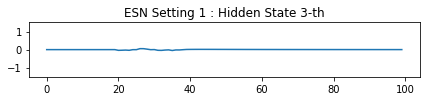

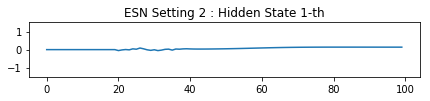

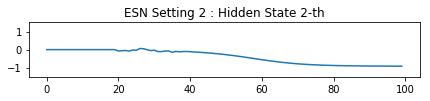

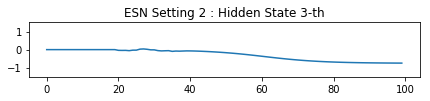

In [70]:
plot_data_and_hidden_states_separated_printing(X, index=8)